In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp
from matplotlib import patches
from matplotlib import animation
from IPython.display import display, clear_output, HTML
from tqdm.notebook import tqdm
from ipywidgets import *

from kjm2601 import obsidian_media_path as path

%matplotlib widget

In [5]:
# Set up a plotting grid
x = np.linspace(-20,20,200)

def psi(x, t, lamb, T):
    return np.exp(2j*np.pi*(x/lamb - t/T))

interactive(children=(FloatSlider(value=1.0, description='lamb', max=5.0, min=-5.0, step=0.01), FloatSlider(va…

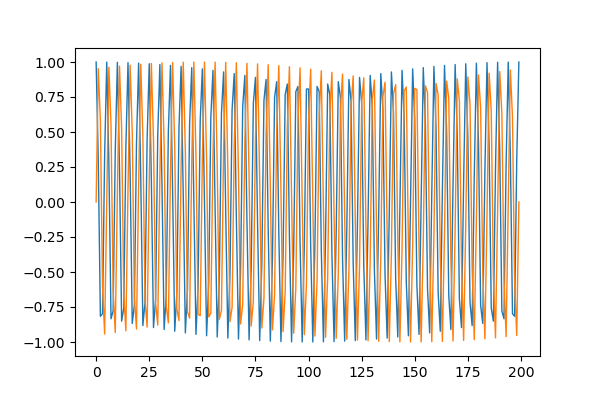

In [11]:
# Set up the plot

lamb = 1.0
T = 1.0
t = 0.0
dt = 0.01

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1, 1, 1)
wf = psi(x,t,lamb,T)
line1, = ax.plot(wf.real, color='C0', linewidth=1.0)
line2, = ax.plot(wf.imag, color='C1', linewidth=1.0)
ax.set_ylim(-1.1,1.1)

# Set up a plot update function for interactive adjustment
def update(lamb = 1.0, T = 1.0):
    global t
    wf = psi(x,t,lamb,T)
    line1.set_ydata(wf.real)
    line2.set_ydata(wf.imag)
    fig.canvas.draw_idle()
    t = t + dt

# Start interacting
interact(update, lamb = (-5.0, 5.0, 0.01), T = (-5,5,0.01));

In [7]:
help(fig.canvas.draw_idle)

Help on method draw_idle in module matplotlib.backends.backend_webagg_core:

draw_idle() method of ipympl.backend_nbagg.Canvas instance
    Request a widget redraw once control returns to the GUI event loop.
    
    Even if multiple calls to `draw_idle` occur before control returns
    to the GUI event loop, the figure will only be rendered once.
    
    Notes
    -----
    Backends may choose to override the method and implement their own
    strategy to prevent multiple renderings.



/var/folders/qc/b2y8zg713_x554g8ykkcbcbh0000gp/T/ipykernel_36463/2099069368.py:18: UserWarning: frames=<generator object Player.play at 0x16a1c18c0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  FuncAnimation.__init__(self,self.fig, self.update, frames=self.play(),


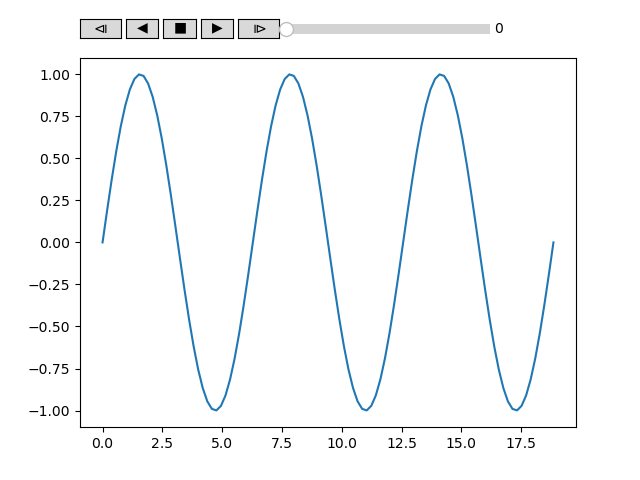

/var/folders/qc/b2y8zg713_x554g8ykkcbcbh0000gp/T/ipykernel_36463/2099069368.py:103: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[i],y[i])
/var/folders/qc/b2y8zg713_x554g8ykkcbcbh0000gp/T/ipykernel_36463/2099069368.py:103: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[i],y[i])
/var/folders/qc/b2y8zg713_x554g8ykkcbcbh0000gp/T/ipykernel_36463/2099069368.py:103: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[i],y[i])
/var/folders/qc/b2y8zg713_x554g8ykkcbcbh0000gp/T/ipykernel_36463/2099069368.py:103: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x[i],y[i])
/var/fol

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.axes_grid1
import matplotlib.widgets

class Player(FuncAnimation):
    def __init__(self, fig, func, frames=None, init_func=None, fargs=None,
                 save_count=None, mini=0, maxi=100, pos=(0.125, 0.92), **kwargs):
        self.i = 0
        self.min=mini
        self.max=maxi
        self.runs = True
        self.forwards = True
        self.fig = fig
        self.func = func
        self.setup(pos)
        FuncAnimation.__init__(self,self.fig, self.update, frames=self.play(), 
                                           init_func=init_func, fargs=fargs,
                                           save_count=save_count, **kwargs )    

    def play(self):
        while self.runs:
            self.i = self.i+self.forwards-(not self.forwards)
            if self.i > self.min and self.i < self.max:
                yield self.i
            else:
                self.stop()
                yield self.i

    def start(self):
        self.runs=True
        self.event_source.start()

    def stop(self, event=None):
        self.runs = False
        self.event_source.stop()

    def forward(self, event=None):
        self.forwards = True
        self.start()
    def backward(self, event=None):
        self.forwards = False
        self.start()
    def oneforward(self, event=None):
        self.forwards = True
        self.onestep()
    def onebackward(self, event=None):
        self.forwards = False
        self.onestep()

    def onestep(self):
        if self.i > self.min and self.i < self.max:
            self.i = self.i+self.forwards-(not self.forwards)
        elif self.i == self.min and self.forwards:
            self.i+=1
        elif self.i == self.max and not self.forwards:
            self.i-=1
        self.func(self.i)
        self.slider.set_val(self.i)
        self.fig.canvas.draw_idle()

    def setup(self, pos):
        playerax = self.fig.add_axes([pos[0],pos[1], 0.64, 0.04])
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(playerax)
        bax = divider.append_axes("right", size="80%", pad=0.05)
        sax = divider.append_axes("right", size="80%", pad=0.05)
        fax = divider.append_axes("right", size="80%", pad=0.05)
        ofax = divider.append_axes("right", size="100%", pad=0.05)
        sliderax = divider.append_axes("right", size="500%", pad=0.07)
        self.button_oneback = matplotlib.widgets.Button(playerax, label='$\u29CF$')
        self.button_back = matplotlib.widgets.Button(bax, label='$\u25C0$')
        self.button_stop = matplotlib.widgets.Button(sax, label='$\u25A0$')
        self.button_forward = matplotlib.widgets.Button(fax, label='$\u25B6$')
        self.button_oneforward = matplotlib.widgets.Button(ofax, label='$\u29D0$')
        self.button_oneback.on_clicked(self.onebackward)
        self.button_back.on_clicked(self.backward)
        self.button_stop.on_clicked(self.stop)
        self.button_forward.on_clicked(self.forward)
        self.button_oneforward.on_clicked(self.oneforward)
        self.slider = matplotlib.widgets.Slider(sliderax, '', 
                                                self.min, self.max, valinit=self.i)
        self.slider.on_changed(self.set_pos)

    def set_pos(self,i):
        self.i = int(self.slider.val)
        self.func(self.i)

    def update(self,i):
        self.slider.set_val(i)


### using this class is as easy as using FuncAnimation:            

fig, ax = plt.subplots()
x = np.linspace(0,6*np.pi, num=100)
y = np.sin(x)

ax.plot(x,y)
point, = ax.plot([],[], marker="o", color="crimson", ms=15)

def update(i):
    point.set_data(x[i],y[i])

ani = Player(fig, update, maxi=len(y)-1)

plt.show()

(1000,) 0.0 1.0 1.0


/var/folders/qc/b2y8zg713_x554g8ykkcbcbh0000gp/T/ipykernel_38481/3886209867.py:96: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update_plot, interval=interval)


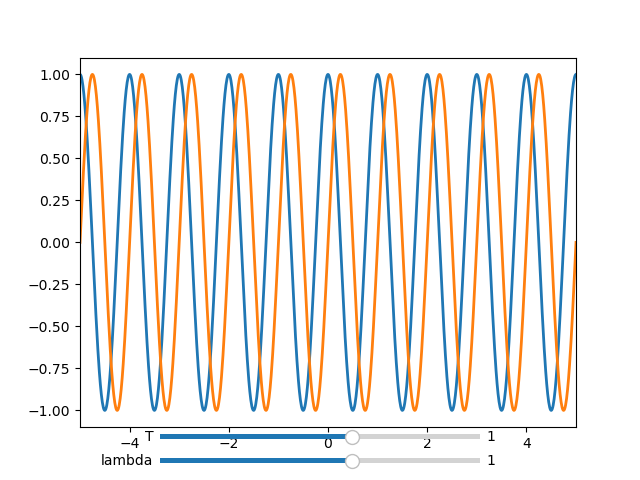

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider
%matplotlib widget


x_min = -5
x_max = 5
x = np.linspace(x_min, x_max, 1000)
t = 0.0
dt = 0.1

def psi(x, t, lamb, T):
    print(x.shape, t, lamb, T)
    return np.exp(2j*np.pi*(x/lamb - t/T))

fig, ax = plt.subplots()

initial_t = t
initial_lamb = 1.0
initial_T = 1.0
y = psi(x, t=initial_t, lamb=initial_lamb, T=initial_T)
l1, = plt.plot(x, y.real, lw=2)
l2, = plt.plot(x, y.imag, lw=2)

ax = plt.axis([x_min, x_max,-1.1,1.1])

ax_lamb = plt.axes([0.25, .03, 0.50, 0.02])
# Slider
s_lamb = Slider(ax_lamb, 'lambda', -5, 5, valinit=initial_lamb)

dy = 0.05
ax_T = plt.axes([0.25, .03+dy, 0.50, 0.02])
# Slider
s_T = Slider(ax_T, 'T', -5, 5, valinit=initial_T)


# Animation controls
is_manual = False # True if user has taken control of the animation
interval = 100 # ms, time between animation frames
loop_len = 5.0 # seconds per loop
scale = interval / 1000 / loop_len

def update_lamb_slider(lamb):
    global is_manual
    is_manual=True
    update(t, lamb, s_T.val)

def update_T_slider(T):
    global is_manual
    is_manual=True
    update(t, s_lamb.val, T)

def update(t, lamb, T):
    # update curve
    y = psi(x, t, lamb, T)
    l1.set_ydata(y.real)
    l2.set_ydata(y.imag)
    # redraw canvas while idle
    fig.canvas.draw_idle()

def update_plot(num):
    global is_manual
    if is_manual:
        return l1, l2, # don't change

    #val = (samp.val + scale) % samp.valmax
    #samp.set_val(val)
    
    T = s_T.val
    lamb = s_lamb.val
    s_T.set_val(T + 1e-9)
    s_lamb.set_val(lamb)
    t = t + dt
    is_manual = False # the above line called update_slider, so we need to reset this
    return l1, l2,

def on_click(event):
    # Check where the click happened
    (xm,ym),(xM,yM) = s_T.label.clipbox.get_points()
    if xm < event.x < xM and ym < event.y < yM:
        # Event happened within the slider, ignore since it is handled in update_slider
        return
    else:
        # user clicked somewhere else on canvas = unpause
        global is_manual
        is_manual=False

# call update function on slider value change
s_T.on_changed(update_T_slider)
s_lamb.on_changed(update_lamb_slider)

fig.canvas.mpl_connect('button_press_event', on_click)

ani = animation.FuncAnimation(fig, update_plot, interval=interval)

plt.show()